In [4]:
import numpy as np
import matplotlib.pyplot as plt


**Initializing Parameters:** Starting with random weights and bias.

In [5]:
def initialize_parameters(n_features):
    w = np.zeros(n_features)
    b = 0
    return w, b

**Hypothesis Function:** Defining the hypothesis function $$y = wx + b$$

In [6]:
def predict(X, w, b):
    return np.dot(X, w) + b

**Loss Function:** Use Mean Squared Error (MSE) to measure the error.

In [7]:
def compute_loss(y_true, y_pred):
    m = y_true.shape[0]
    loss = (1/(2*m)) * np.sum((y_pred - y_true)**2)
    return loss

**Gradient Descent:** Update the weights and bias iteratively to minimize the loss.

In [20]:
def gradient_descent(X, y, w, b, learning_rate, num_iterations):
    m = X.shape[0]
    loss_history = []
    
    for i in range(num_iterations):
        y_pred = predict(X, w, b)
        dw = (1/m) * np.dot(X.T, (y_pred - y))
        db = (1/m) * np.sum(y_pred - y)
        
        #Updating weights and bias
        w -= learning_rate * dw
        b -= learning_rate * db
        
        #Computing and storing loss
        loss = compute_loss(y, y_pred)
        loss_history.append(loss)
        
        if i % 100 == 0:
            print("Iterations: ", i, "Loss:" , loss)
    
    return w, b, loss_history

#### Generating some random data

In [9]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
y = y.reshape(-1)

#### Initializing parameters

In [10]:
n_features = X.shape[1]
w, b = initialize_parameters(n_features)

#### Setting hyperparameters and performing gradient descent.

In [26]:

learning_rate = 0.01
num_iterations = 1000


w, b, loss_history = gradient_descent(X, y, w, b, learning_rate, num_iterations)

Iterations:  0 Loss: 0.4032922882522204
Iterations:  100 Loss: 0.40329228644668114
Iterations:  200 Loss: 0.4032922851611821
Iterations:  300 Loss: 0.4032922842459385
Iterations:  400 Loss: 0.4032922835943078
Iterations:  500 Loss: 0.40329228313036297
Iterations:  600 Loss: 0.40329228280004553
Iterations:  700 Loss: 0.403292282564868
Iterations:  800 Loss: 0.40329228239742726
Iterations:  900 Loss: 0.4032922822782136


#### Scatter Plot and Regression Line

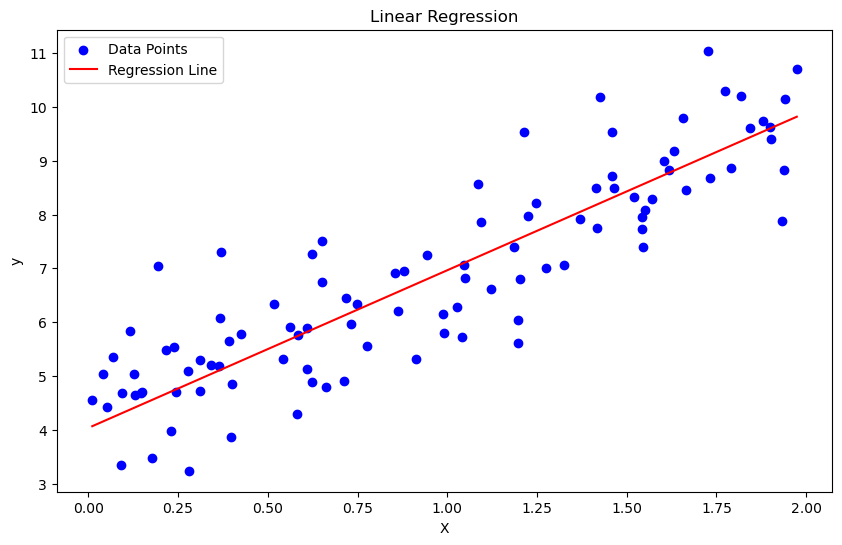

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')
X_range = np.linspace(X.min(), X.max(), 100)
y_pred_range = predict(X_range.reshape(-1, 1), w, b)
plt.plot(X_range, y_pred_range, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

#### Plotting the loss over iterations

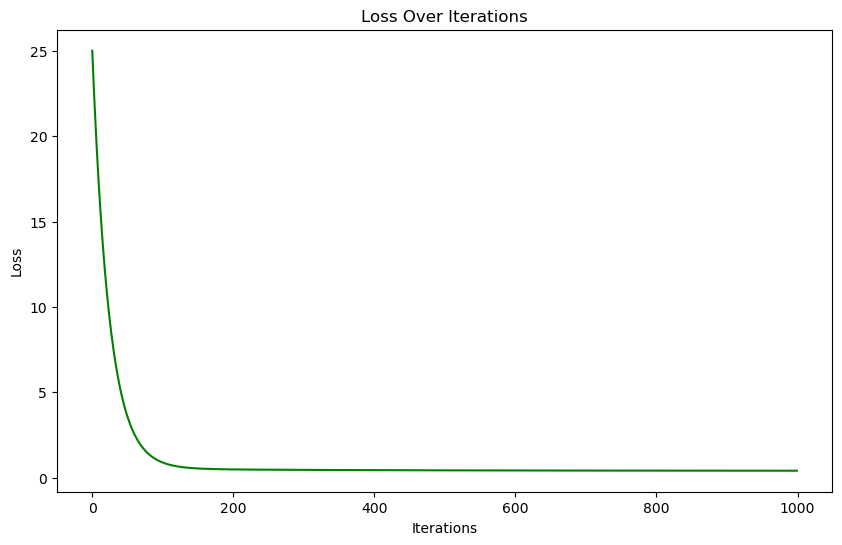

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), loss_history, color='green')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Over Iterations')
plt.show()
